In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
import scipy

$$
a^TX^TYb+\lambda_1(a^TX^TXa-I)+\lambda_2(b^TY^TYb-I)\\
\frac{dC}{da}=X^TYb+\lambda_1(X^TXa)\\
\frac{dC}{db}=Y^TXa+\lambda_2(Y^TYb)\\
\frac{dC}{d\lambda_1}=a^TX^TXa-I\\
\frac{dC}{d\lambda_2}=b^TY^TYb-I
$$

In [36]:
def streamingCCA(X,Y,n):
    
    length,m = X.shape
    
    a = np.random.randn(m,n)
    a,_ = np.linalg.qr(a, mode='reduced')
    b = np.random.randn(m,n)
    b,_ = np.linalg.qr(b, mode='reduced')
    
    l1 = 0.4
    l2 = 0.4
    
    list1 = []
    list2 = []
    
    corr_list = np.zeros((n,499))
    
    covx = np.zeros((m,m))
    covy = np.zeros((m,m))
    
    eta1 = 0.0025
    eta2 = 0.0005
    
    c11 = []
    c22 = []
    c12 = []
    
    for i in range(112800):
        
        x = X[i,:]
        y = Y[i,:]
        
        c12.append(np.outer(x,y))
        c11.append(np.outer(x,x))
        c22.append(np.outer(y,y))
        
    for j in range(0,499):
        for i in range(500):
    
            ind = (j*500+i)%112800
            
            a += eta1*(c12[ind]@b-l1*(c11[ind]@a))
            b += eta1*(c12[ind].T@a-l2*(c22[ind]@b))
            l1 += eta2*(a.T@c11[ind]@a-1)
            l2 += eta2*(b.T@c22[ind]@b-1)
    
        X_s = X@a
        Y_s = Y@b    
        list1.append(float(l1.copy()))
        list2.append(float(l2.copy()))
        
        for k in range(n):
            corr_list[k,j] = np.corrcoef(X_s.T,Y_s.T)[n+k,k]

        
    return a,b,list1,list2,corr_list

In [37]:
'''
l1 = np.random.normal(size=100000)
l2 = np.random.normal(size=100000)
l3 = np.random.normal(size=100000)

latents = np.array([l1, l1*0.5, l1*0.25, l2*0.7, l2*0.3, l3*0.5]).T
X = latents + np.random.normal(size=6 * 100000).reshape((100000, 6))*0.5
Y = latents + np.random.normal(size=6 * 100000).reshape((100000, 6))*0.5

X = X-X.mean(axis=0)
Y = Y-Y.mean(axis=0)
'''

'\nl1 = np.random.normal(size=100000)\nl2 = np.random.normal(size=100000)\nl3 = np.random.normal(size=100000)\n\nlatents = np.array([l1, l1*0.5, l1*0.25, l2*0.7, l2*0.3, l3*0.5]).T\nX = latents + np.random.normal(size=6 * 100000).reshape((100000, 6))*0.5\nY = latents + np.random.normal(size=6 * 100000).reshape((100000, 6))*0.5\n\nX = X-X.mean(axis=0)\nY = Y-Y.mean(axis=0)\n'

In [38]:
'''
x = tf.keras.datasets.cifar10.load_data()[0][0]
x = x.reshape(-1,32*32*3)
x = x/255
x = (x - x.mean(axis=0))
X = x[:,:10]
Y = x[:,-10:]
'''

'\nx = tf.keras.datasets.cifar10.load_data()[0][0]\nx = x.reshape(-1,32*32*3)\nx = x/255\nx = (x - x.mean(axis=0))\nX = x[:,:10]\nY = x[:,-10:]\n'

In [39]:
x = np.load('balanced-MNIST.npy')
x = x/255
x = (x - x.mean(axis=0))
X = x[:,300:335]
Y = x[:,400:435]

In [40]:
n=1
a,b,list1,list2,corr_list = streamingCCA(X, Y, n)
cca = CCA(n_components=n,max_iter=60000)
cca.fit(X, Y)
X_c, Y_c = cca.transform(X, Y)

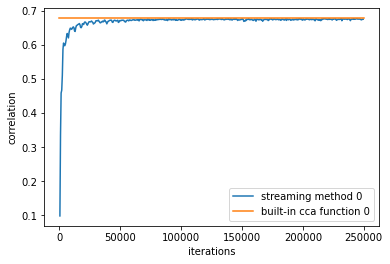

In [41]:
for i in range(n):
    plt.plot(np.array(list(range(1,500)))*500,corr_list[i,:],label='streaming method {}'.format(i))
    plt.plot([100,250000],[np.corrcoef(X_c.T,Y_c.T)[n+i,i],np.corrcoef(X_c.T,Y_c.T)[n+i,i]],label='built-in cca function {}'.format(i))
    plt.xlabel('iterations')
    plt.ylabel('correlation')
    plt.legend()
    plt.show()

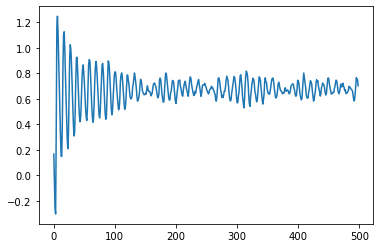

In [42]:
plt.plot(list1)

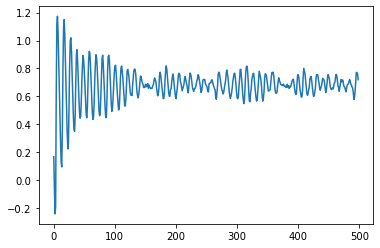

In [43]:
plt.plot(list2)

In [31]:
corr_list

array([[0.60618464, 0.61881671, 0.63654091, 0.63347326, 0.65296596,
        0.62721271, 0.64285556, 0.62061338, 0.61032329, 0.65156443,
        0.64107514, 0.65232433, 0.6268931 , 0.64796068, 0.65190882,
        0.64321217, 0.65562821, 0.63520118, 0.63365437, 0.6330156 ,
        0.65846433, 0.65625214, 0.63494731, 0.6386554 , 0.648677  ,
        0.63452067, 0.67000934, 0.64194723, 0.63649371, 0.58278076,
        0.64118398, 0.62955235, 0.65416638, 0.62490714, 0.64657046,
        0.65376683, 0.63914307, 0.64786101, 0.63656608, 0.62914853,
        0.63607461, 0.64940067, 0.6503911 , 0.65351101, 0.65892224,
        0.65693424, 0.65301351, 0.66463541, 0.65795772, 0.6441514 ,
        0.64989327, 0.64466912, 0.65927009, 0.63294575, 0.66251758,
        0.64770838, 0.65286901, 0.65305921, 0.64912065, 0.65864927,
        0.65614966, 0.64618467, 0.65233528, 0.63141987, 0.65326909,
        0.65942317, 0.65846691, 0.64951119, 0.66288154, 0.64876685,
        0.65411941, 0.65321875, 0.63189532, 0.65

In [32]:
a/np.linalg.norm(a)

array([[-0.01898793],
       [-0.12580654],
       [-0.13575253],
       [ 0.22592146],
       [ 0.19184402],
       [-0.07289691],
       [-0.12137675],
       [ 0.02318787],
       [ 0.03357935],
       [-0.09152612],
       [-0.01879594],
       [-0.18409787],
       [-0.23177859],
       [-0.18904526],
       [-0.11510876],
       [ 0.03083896],
       [ 0.04598697],
       [ 0.02595594],
       [ 0.06058229],
       [ 0.01089066],
       [-0.07134465],
       [ 0.02371628],
       [ 0.04927165],
       [ 0.09512222],
       [ 0.0364007 ],
       [ 0.03818107],
       [ 0.04339881],
       [ 0.09322148],
       [ 0.20346797],
       [ 0.16563381],
       [-0.02372869],
       [-0.57160273],
       [-0.51359215],
       [ 0.05590007],
       [ 0.09723129]])

In [33]:
cca = CCA(n_components=4,max_iter=60000)
cca.fit(X, Y)
X_c, Y_c = cca.transform(X, Y)

In [34]:
cca.x_weights_

array([[ 6.27041385e-02,  2.07887706e-01,  4.41488273e-01,
         2.65301135e-01],
       [ 1.80173189e-01, -1.03716291e-01, -1.27422585e-01,
        -1.98078110e-01],
       [ 1.21596283e-01, -1.90761168e-01,  1.47166403e-01,
        -5.31539722e-02],
       [-1.77411915e-01, -2.48091715e-01,  4.69034746e-03,
         1.73890235e-01],
       [-1.95834862e-01,  1.80638057e-01, -1.86595506e-01,
        -6.04329206e-02],
       [ 1.43190348e-02,  5.45486602e-02, -5.49307337e-02,
        -1.30584767e-01],
       [ 1.44348168e-02, -2.34758352e-02,  1.58661384e-02,
         2.89268783e-02],
       [ 7.12061827e-16, -3.30828449e-16,  7.06403448e-16,
         1.25190211e-16],
       [-1.32139557e-16,  2.67247521e-16, -3.91301599e-16,
         4.97611382e-16],
       [ 7.76877878e-04, -1.69607512e-02,  7.81815631e-03,
         4.99476161e-02],
       [-6.03091144e-03, -7.16776691e-02,  2.33866605e-02,
         3.04618693e-02],
       [ 1.04126868e-01, -3.05897986e-02, -1.40642333e-01,
      

In [35]:
np.corrcoef(X_c.T,Y_c.T)[2,6]

0.412285316090306